In [1]:
#Primero, importo las librerías a utilizar. (En caso de necesitar otras, las agrego acá para que quede más prolijo)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargo el DF Internet, yo quiero que cada hoja quede guardada en un DF por separado, para facilitarme el análisis:
internet = 'Internet.xlsx'

In [3]:
dataframes = {} #Inicializo un diccionario vacío para almacenar los DF
hojas = [
    'Acc_vel_loc_sinrangos',
    'Velocidad % por prov',
    'Accesos_tecnologia_localidad',
    'Totales Accesos Por Tecnología', #Cargo las hojas que seleccioné previamente leyendo el diccionario de datos proporcionado
    'Penetracion-totales',
    'Ingresos'
]

In [4]:
for hoja in hojas:
    dataframes[hoja] = pd.read_excel(internet, sheet_name=hoja) #Cargo cada hoja en un DF

In [5]:
#Ahora si, puedo empezar con el análisis básico utilizando 'Describe' para ver las estadísticas de cada DF.
acc_vel_sinrangos = dataframes['Acc_vel_loc_sinrangos']
print(acc_vel_sinrangos.describe())

              Otros  0,256 Mbps      0,5 Mbps  0,512 Mbps    0,75 Mbps  \
count    877.000000   37.000000    642.000000  526.000000   284.000000   
mean     337.049031    2.891892     44.361371    2.131179    39.588028   
std     2305.905335    5.733836   1020.505642    4.731243   118.563946   
min       -2.000000    1.000000      0.000000    1.000000     1.000000   
25%        1.000000    1.000000      1.000000    1.000000     3.000000   
50%        8.000000    1.000000      1.000000    1.000000     9.500000   
75%       72.000000    2.000000      2.000000    1.000000    28.000000   
max    57702.000000   31.000000  25856.000000   61.000000  1307.000000   

            1 Mbps     1,5 Mbps       2 Mbps  2,2 Mbps    2,5 Mbps  ...  \
count   889.000000    15.000000   686.000000       1.0    5.000000  ...   
mean     68.052868   132.533333   101.804665      18.0  130.400000  ...   
std     207.467995   291.222268   277.944787       NaN  195.566613  ...   
min       0.000000     7.000000  

Con este describe, obtenemos métricas importantes como la media, la deviación estándar, el mínimo y el máximo. 

In [6]:
acc_vel_sinrangos.head() #Visualizo las primeras filas de cada DF, para tener una noción de con que datos estoy trabajando.

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Como vimos arriba 'Acc_vel_loc_sinrangos' contiene muchos valores nulos, así que voy a llenarlos con 0 en lugar de eliminarlos, ya que podría resultar útil más adelante.
acc_vel_sinrangos = acc_vel_sinrangos.fillna(0)

In [8]:
#Chequeamos que se hayan rellenado correctamente los valores
acc_vel_sinrangos.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
vel_por_prov = dataframes['Velocidad % por prov'] #Repito por cada hoja
print(vel_por_prov.describe())

               Año   Trimestre  Mbps (Media de bajada)
count   960.000000  960.000000              960.000000
mean   2018.500000    2.500000               21.615685
std       2.873778    1.118617               29.340345
min    2014.000000    1.000000                2.573729
25%    2016.000000    1.750000                4.685122
50%    2018.500000    2.500000                8.885746
75%    2021.000000    3.250000               25.682270
max    2023.000000    4.000000              234.440000


In [10]:
vel_por_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.49
1,2023,4,Capital Federal,234.44
2,2023,4,Catamarca,89.40
3,2023,4,Chaco,107.14
4,2023,4,Chubut,20.29


In [11]:
accesos_tecnologia_localidad = dataframes['Accesos_tecnologia_localidad']
print(accesos_tecnologia_localidad.describe())

               ADSL    CABLEMODEM      DIAL UP   FIBRA OPTICA         OTROS  \
count   3076.000000  3.076000e+03  3076.000000    3076.000000   3076.000000   
mean     271.908322  1.957910e+03     3.833875    1270.540637     57.809818   
std     1550.899791  2.315212e+04    43.153830    8467.801469    793.944335   
min        0.000000  0.000000e+00     0.000000       0.000000      0.000000   
25%        0.000000  0.000000e+00     0.000000       0.000000      0.000000   
50%        0.000000  0.000000e+00     0.000000       1.000000      0.000000   
75%       78.250000  8.500000e+00     0.000000     152.000000      0.000000   
max    58700.000000  1.198835e+06  2050.000000  269623.000000  27703.000000   

         SATELITAL        WIMAX      WIRELESS  Total general  
count  3076.000000  3076.000000   3076.000000   3.076000e+03  
mean      0.972692     0.711313    190.429129   3.754116e+03  
std      13.648046    15.093030    712.357143   3.119100e+04  
min       0.000000     0.000000     

In [12]:
accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [13]:
totales_accesos_por_tecnologia = dataframes['Totales Accesos Por Tecnología']
print(totales_accesos_por_tecnologia.describe())

               Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    40.000000  40.000000  4.000000e+01  4.000000e+01  4.000000e+01   
mean   2018.500000   2.500000  2.791887e+06  4.359240e+06  1.081302e+06   
std       2.908872   1.132277  1.027693e+06  1.308010e+06  1.179722e+06   
min    2014.000000   1.000000  8.363900e+05  2.407330e+06  1.391870e+05   
25%    2016.000000   1.750000  2.001598e+06  3.102459e+06  1.694705e+05   
50%    2018.500000   2.500000  3.230908e+06  4.374635e+06  5.125560e+05   
75%    2021.000000   3.250000  3.716772e+06  5.687862e+06  1.495696e+06   
max    2023.000000   4.000000  3.803024e+06  6.073426e+06  3.908183e+06   

            Wireless          Otros         Total  
count      40.000000      40.000000  4.000000e+01  
mean   289710.900000  154847.925000  8.676987e+06  
std    197048.992979   82678.927051  1.655946e+06  
min     70749.000000   54300.000000  6.398398e+06  
25%     85307.250000   69048.000000  7.187732e+06  
50%    27035

In [14]:
totales_accesos_por_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
1,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
2,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
3,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
4,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022


In [15]:
penetracion_totales = dataframes['Penetracion-totales']
print(penetracion_totales.describe())

               Año  Trimestre  Accesos por cada 100 hogares  \
count    40.000000  40.000000                     40.000000   
mean   2018.500000   2.500000                     62.436404   
std       2.908872   1.132277                      9.563500   
min    2014.000000   1.000000                     49.545821   
25%    2016.000000   1.750000                     53.636190   
50%    2018.500000   2.500000                     61.947487   
75%    2021.000000   3.250000                     69.574850   
max    2023.000000   4.000000                     78.560000   

       Accesos por cada 100 hab  
count                 40.000000  
mean                  19.319330  
std                    3.134956  
min                   15.050104  
25%                   16.471345  
50%                   19.138953  
75%                   21.656592  
max                   24.660000  


In [16]:
penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,78.56,24.66,Oct-Dic 2023
1,2023,3,77.84,24.41,Jul-Sept 2023
2,2023,2,77.02,24.14,Abr-Jun 2023
3,2023,1,77.20,24.17,Ene-Mar 2023
4,2022,4,77.21,24.15,Oct-Dic 2022


In [17]:
ingresos = dataframes['Ingresos']
print(ingresos.describe())

               Año  Trimestre  Ingresos (miles de pesos)
count    40.000000  40.000000               4.000000e+01
mean   2018.750000   2.500000               3.281153e+07
std       3.642696   1.132277               3.850304e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.750000               6.817891e+06
50%    2018.500000   2.500000               1.842255e+07
75%    2021.000000   3.250000               3.942974e+07
max    2033.000000   4.000000               1.673760e+08


In [18]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


In [19]:
#Ahora, voy a chequear nulos, duplicados y outliers. Empezando por nulos.
for hoja, df in dataframes.items():
    print(f'Duplicados en la hoja {hoja}:')
    duplicados = df[df.duplicated()]
    if not duplicados.empty:
        print(duplicados)
    else:
        print('No hay duplicados')
    print('\n')
    
    print(f'Valores nulos en la hoja {hoja}:')
    nulos = df.isnull().sum()
    if nulos.sum() > 0:
        print(nulos[nulos > 0])
    else:
        print('No hay valores nulos')
    print('\n')

Duplicados en la hoja Acc_vel_loc_sinrangos:
No hay duplicados


Valores nulos en la hoja Acc_vel_loc_sinrangos:
Otros         2189
0,256 Mbps    3029
0,5 Mbps      2424
0,512 Mbps    2540
0,75 Mbps     2782
              ... 
850 Mbps      3065
900 Mbps      3065
999 Mbps      3049
1000 Mbps     2648
1024 Mbps     3065
Length: 132, dtype: int64


Duplicados en la hoja Velocidad % por prov:
No hay duplicados


Valores nulos en la hoja Velocidad % por prov:
No hay valores nulos


Duplicados en la hoja Accesos_tecnologia_localidad:
No hay duplicados


Valores nulos en la hoja Accesos_tecnologia_localidad:
No hay valores nulos


Duplicados en la hoja Totales Accesos Por Tecnología:
No hay duplicados


Valores nulos en la hoja Totales Accesos Por Tecnología:
No hay valores nulos


Duplicados en la hoja Penetracion-totales:
No hay duplicados


Valores nulos en la hoja Penetracion-totales:
No hay valores nulos


Duplicados en la hoja Ingresos:
No hay duplicados


Valores nulos en la hoja Ing

In [20]:
#Aplicamos el mismo bucle for, pero esta vez para los duplicados
for hoja, df in dataframes.items():
    print(f'Duplicados en la hoja {hoja}:')
    duplicados = df[df.duplicated()]
    if not duplicados.empty:
        print(duplicados)
    else:
        print('No hay duplicados')
    print('\n')

Duplicados en la hoja Acc_vel_loc_sinrangos:
No hay duplicados


Duplicados en la hoja Velocidad % por prov:
No hay duplicados


Duplicados en la hoja Accesos_tecnologia_localidad:
No hay duplicados


Duplicados en la hoja Totales Accesos Por Tecnología:
No hay duplicados


Duplicados en la hoja Penetracion-totales:
No hay duplicados


Duplicados en la hoja Ingresos:
No hay duplicados




#Ya vi que no hay valores duplicados, así que procedo con los outliers. 

In [21]:

def encontrar_outliers_zscore(df, umbral=3): #Función para detectar outliers utilizando el Z-score
    outliers = pd.DataFrame()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        mean_col = df[col].mean()
        std_col = df[col].std()
        z_scores = (df[col] - mean_col) / std_col
        outliers_col = df[np.abs(z_scores) > umbral]
        if not outliers_col.empty:
            outliers = pd.concat([outliers, outliers_col])
    return outliers

In [22]:
for hoja, df in dataframes.items():
    print(f'Outliers en la hoja {hoja}:')
    outliers = encontrar_outliers_zscore(df)
    if not outliers.empty:
        print(outliers)
    else:
        print('No hay outliers')
    print('\n')

Outliers en la hoja Acc_vel_loc_sinrangos:
         Provincia                          Partido  \
501   BUENOS AIRES                            OTROS   
867         CHUBUT                           Biedma   
1455    ENTRE RIOS                            OTROS   
2087       NEUQUEN                            OTROS   
2126     RIO NEGRO                        Bariloche   
...            ...                              ...   
270   BUENOS AIRES               General Pueyrredón   
955        CORDOBA                          Capital   
2725      SANTA FE                          Rosario   
714           CABA  Ciudad Autónoma de Buenos Aires   
714           CABA  Ciudad Autónoma de Buenos Aires   

                            Localidad Link Indec    Otros  0,256 Mbps  \
501                             Otros  Sin Datos  57702.0         NaN   
867                     Puerto Madryn   26007020  10074.0         NaN   
1455                            Otros  Sin Datos   7728.0         NaN   
2087

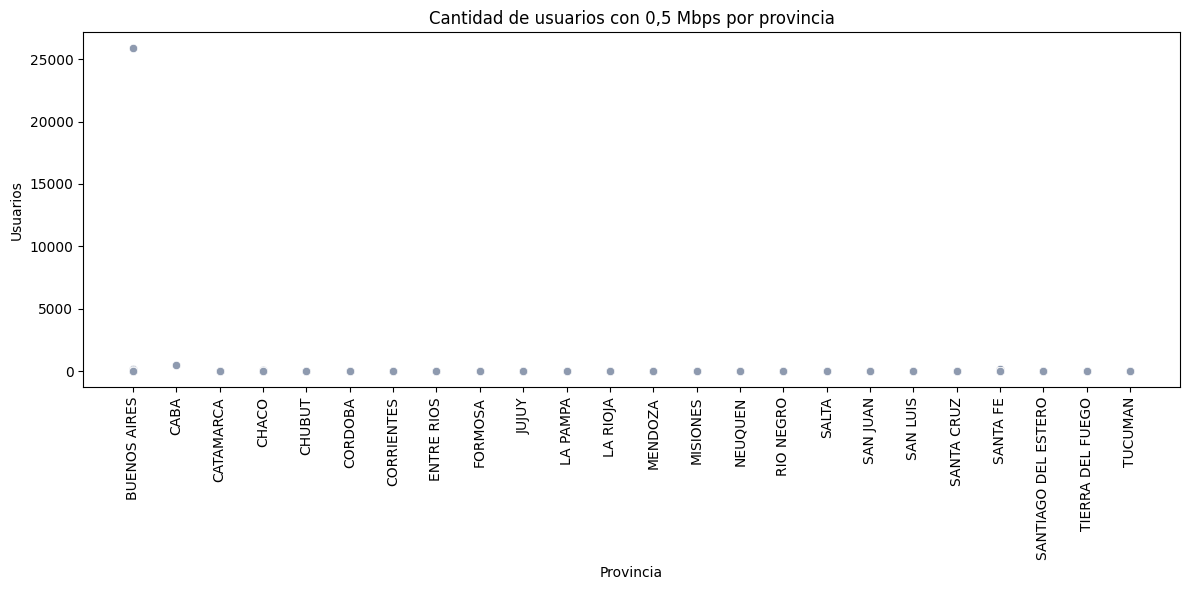

In [23]:
#Procedo a graficar outliers. Tomando 'Provincia' como variable cualitativa, y la velocidad como variable cuantitativa.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=acc_vel_sinrangos, x='Provincia', y='0,5 Mbps', color='#8E9AAF')
plt.title('Cantidad de usuarios con 0,5 Mbps por provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

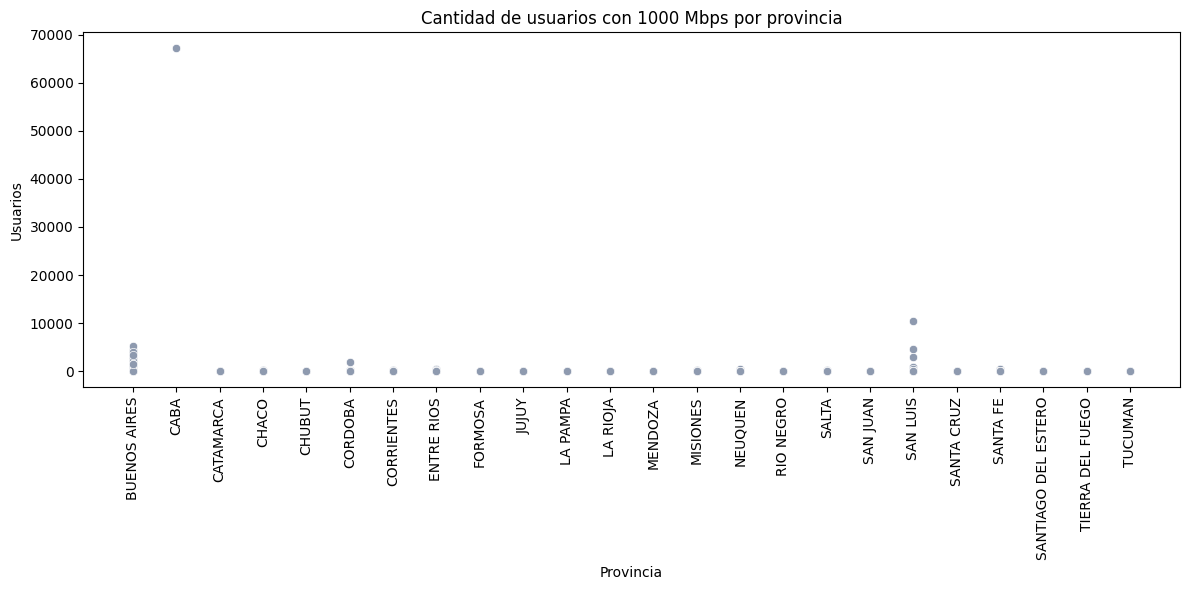

In [24]:
#Procedo a graficar outliers. Tomando 'Provincia' como variable cualitativa, y la velocidad como variable cuantitativa.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=acc_vel_sinrangos, x='Provincia', y='1000 Mbps', color='#8E9AAF')
plt.title('Cantidad de usuarios con 1000 Mbps por provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

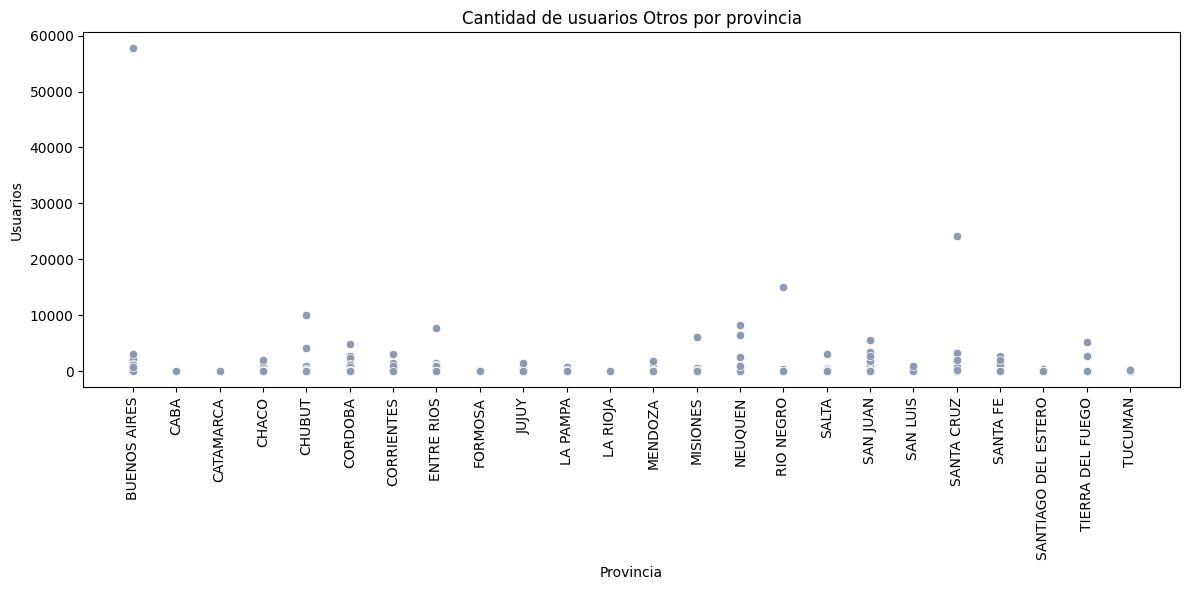

In [25]:
#Procedo a graficar outliers. Tomando 'Provincia' como variable cualitativa, y la velocidad como variable cuantitativa.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=acc_vel_sinrangos, x='Provincia', y='Otros', color='#8E9AAF')
plt.title('Cantidad de usuarios ''Otros'' por provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

En base a estos gráficos, podemos ver que Buenos Aires, refiriéndose al interior de la provincia, presenta una elevada cantidad de habitantes con velocidad de 0,5 Mbps, también, cuenta con una gran cantidad de 'Otros'. Mientras que CABA, por el otro lado, es quien cuenta con más cantidad de habitantes con velocidad de 1000Mbps. Esto, posiblemente se deba al tipo de tecnología de la zona, para confirmar esto, continúo graficando los accesos de tecnología por provincia.

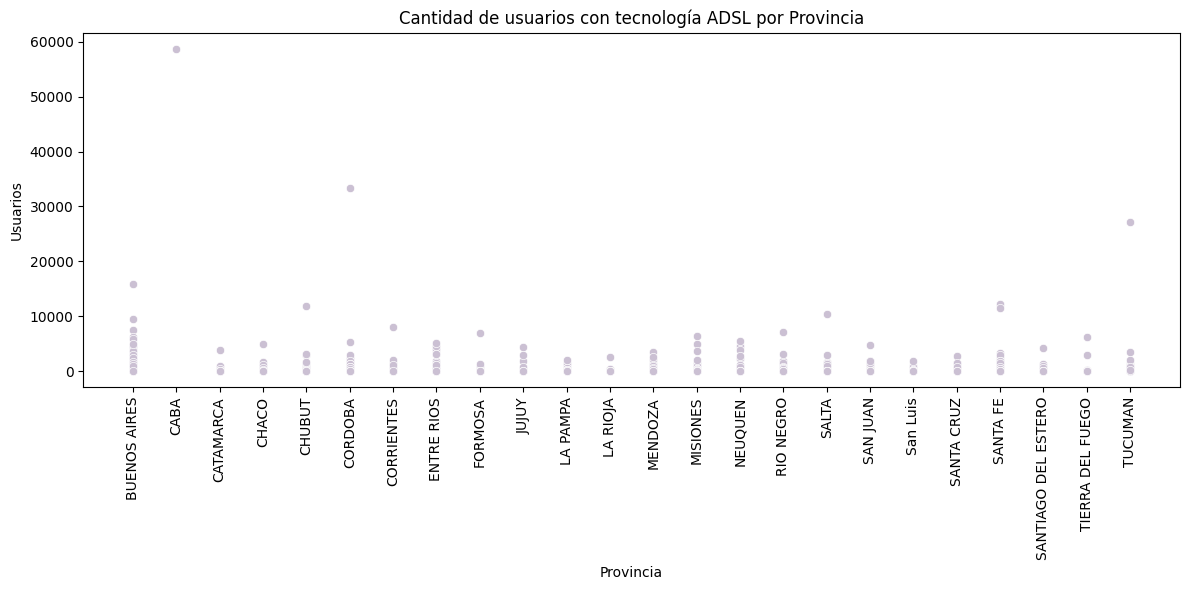

In [26]:
#Lo mismo que antes. #Procedo a graficar outliers. Tomando 'Provincia' como variable cualitativa, y el tipo de tecnología como variable cuantitativa.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=accesos_tecnologia_localidad, x='Provincia', y='ADSL', color='#CBC0D3')
plt.title('Cantidad de usuarios con tecnología ADSL por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

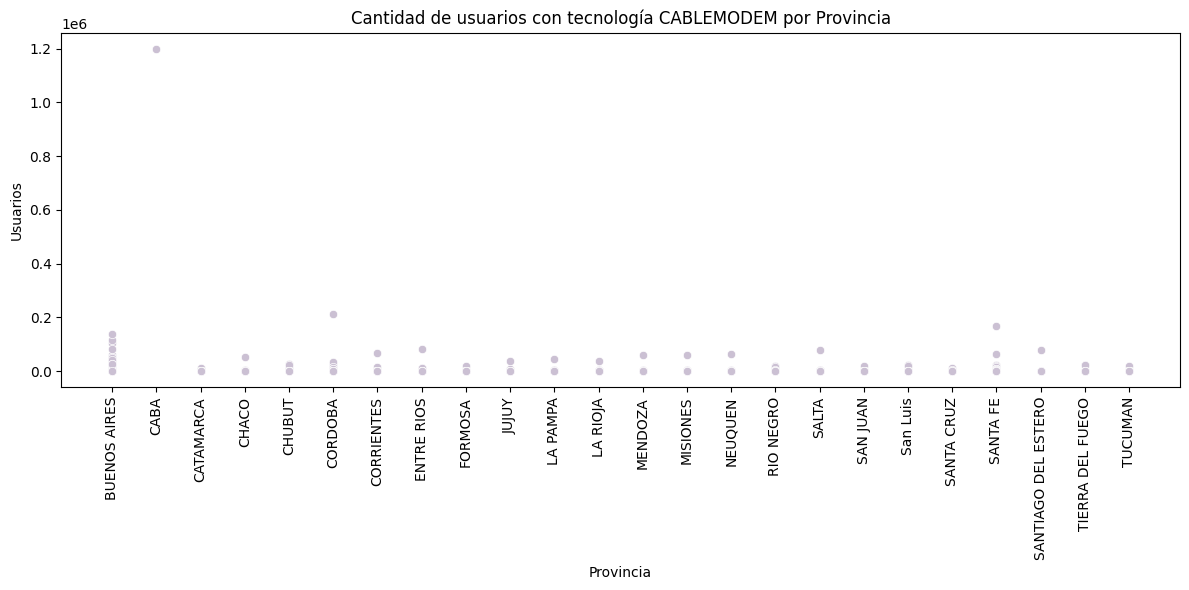

In [27]:
#Procedo a graficar outliers. Tomando 'Provincia' como variable cualitativa, y el tipo de tecnología como variable cuantitativa.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=accesos_tecnologia_localidad, x='Provincia', y='CABLEMODEM', color='#CBC0D3')
plt.title('Cantidad de usuarios con tecnología CABLEMODEM por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

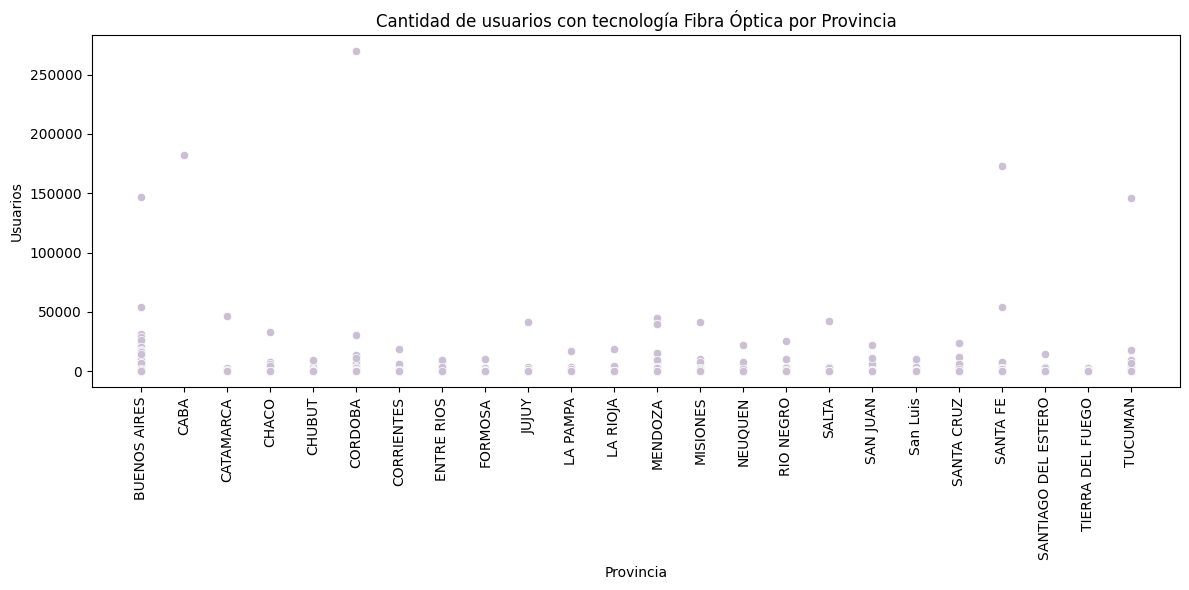

In [28]:
#Procedo a graficar outliers. Tomando 'Provincia' como variable cualitativa, y el tipo de tecnología como variable cuantitativa.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=accesos_tecnologia_localidad, x='Provincia', y='FIBRA OPTICA', color='#CBC0D3')
plt.title('Cantidad de usuarios con tecnología Fibra Óptica por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

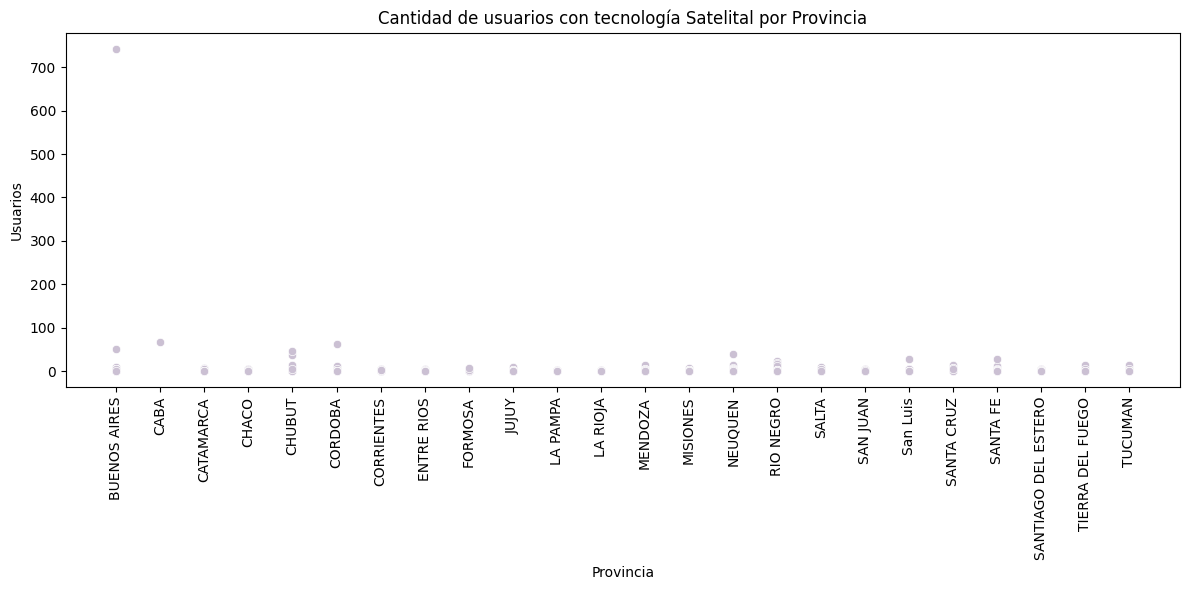

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=accesos_tecnologia_localidad, x='Provincia', y='SATELITAL', color='#CBC0D3')
plt.title('Cantidad de usuarios con tecnología Satelital por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

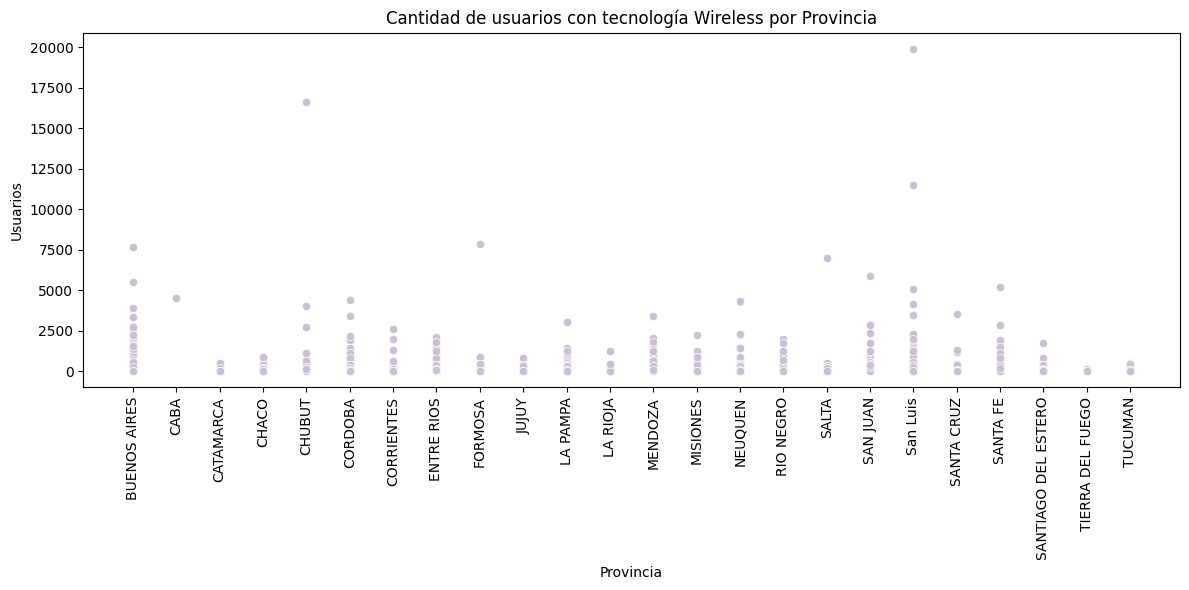

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=accesos_tecnologia_localidad, x='Provincia', y='WIRELESS', color='#CBC0D3')
plt.title('Cantidad de usuarios con tecnología Wireless por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Usuarios')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

Viendo el tipo de tecnología con el que cuenta en mayoridad cada provincia, vemos que quien poseen la tecnología más antigua y lenta es el interior de Buenos Aires, coincidiendo con el gráfico de 'acc_vel_loc_sinrangos' .Por el contrario, CABA, Córdoba, Santa Fé y Tucumán son quienes poseen la tecnología más rápida, siendo esta la fibra óptica.

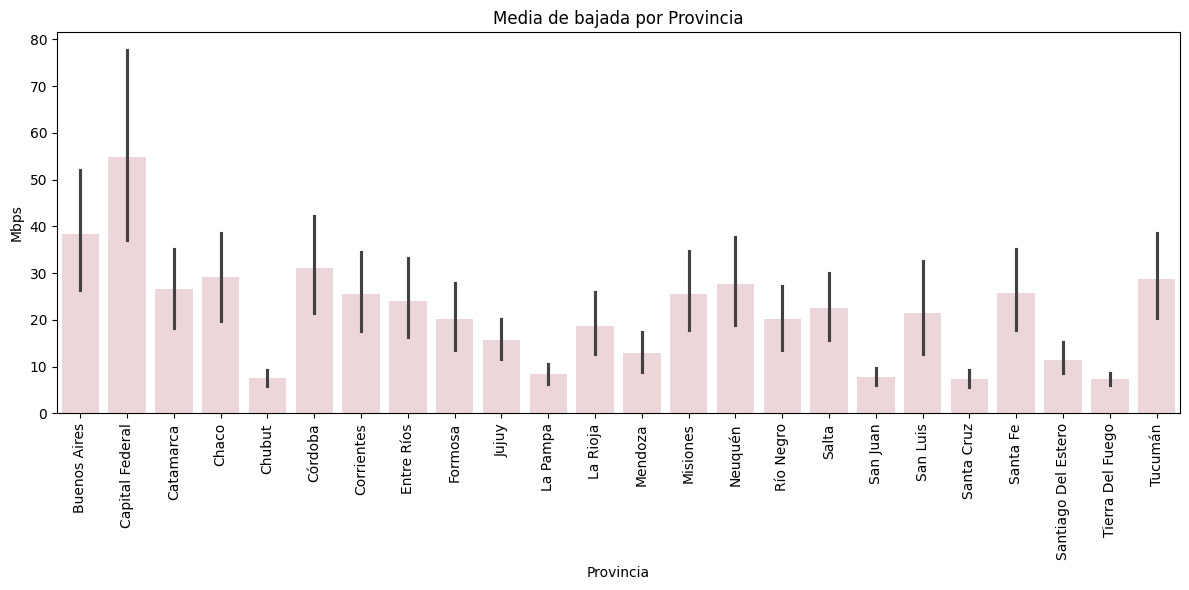

In [31]:
#Ahora, visualizamos la velocidad por provincia. Tomando 'Provincia' como variable cualitativa, y la media de bajada como cuantitativa.
plt.figure(figsize=(12, 6))
sns.barplot(data=vel_por_prov, x='Provincia', y='Mbps (Media de bajada)', color='#EFD3D7')
plt.title('Media de bajada por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Acá vemos, que otra vez CABA toma el lider en cuanto a la media de bajada. Siendo quien cuenta con la media más alta. Y Chubut, San Juan, San Luis y Tierra del Fuego los que cuentan con la más baja.

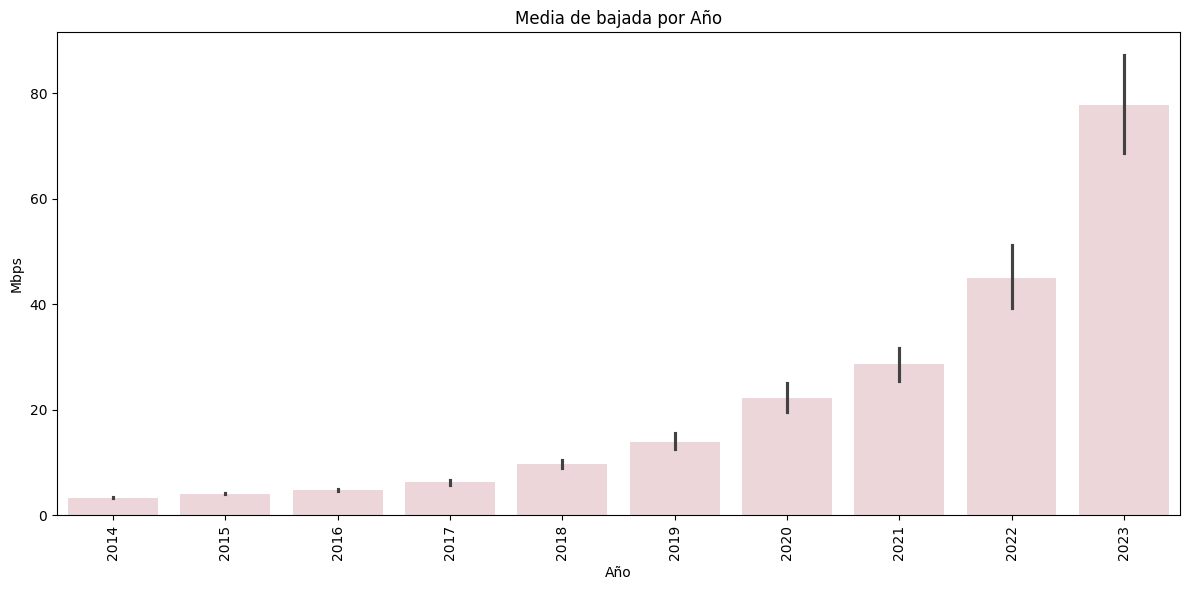

In [32]:
#Ahora, quiero ver la media de bajada por Año, tomando 'año' como cualitativa y Mbps como cuantitativa.
plt.figure(figsize=(12, 6))
sns.barplot(data=vel_por_prov, x='Año', y='Mbps (Media de bajada)', color='#EFD3D7')
plt.title('Media de bajada por Año')
plt.xlabel('Año')
plt.ylabel('Mbps')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

En este gráfico, podemos ver que la media fue aumentando con el paso del tiempo. Esto es posible que se deba a la mejora de la tecnología a lo largo de los años.

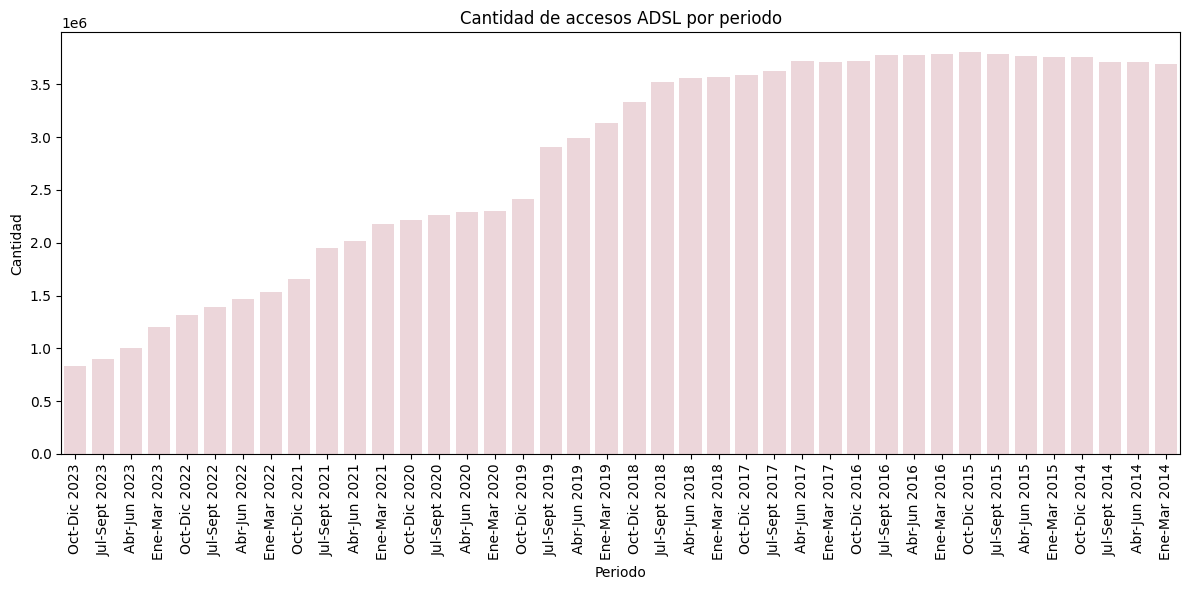

In [33]:
#Veamos la cantidad de accesos totales por tecnología según el periodo. Tomando el tipo de tecnología como variable cuantitativa, y el periodo como cualitativa.
plt.figure(figsize=(12,6))
sns.barplot(data=totales_accesos_por_tecnologia, x='Periodo', y='ADSL', color='#EFD3D7')
plt.title('Cantidad de accesos ADSL por periodo')
plt.ylabel('Cantidad')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

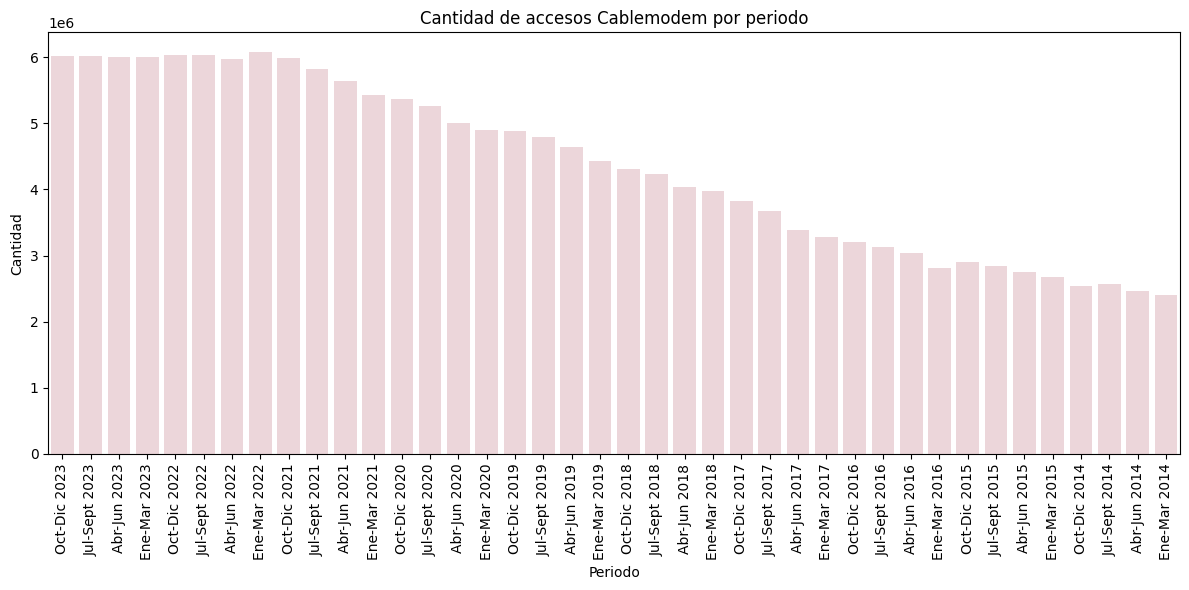

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=totales_accesos_por_tecnologia, x='Periodo', y='Cablemodem', color='#EFD3D7')
plt.title('Cantidad de accesos Cablemodem por periodo')
plt.ylabel('Cantidad')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

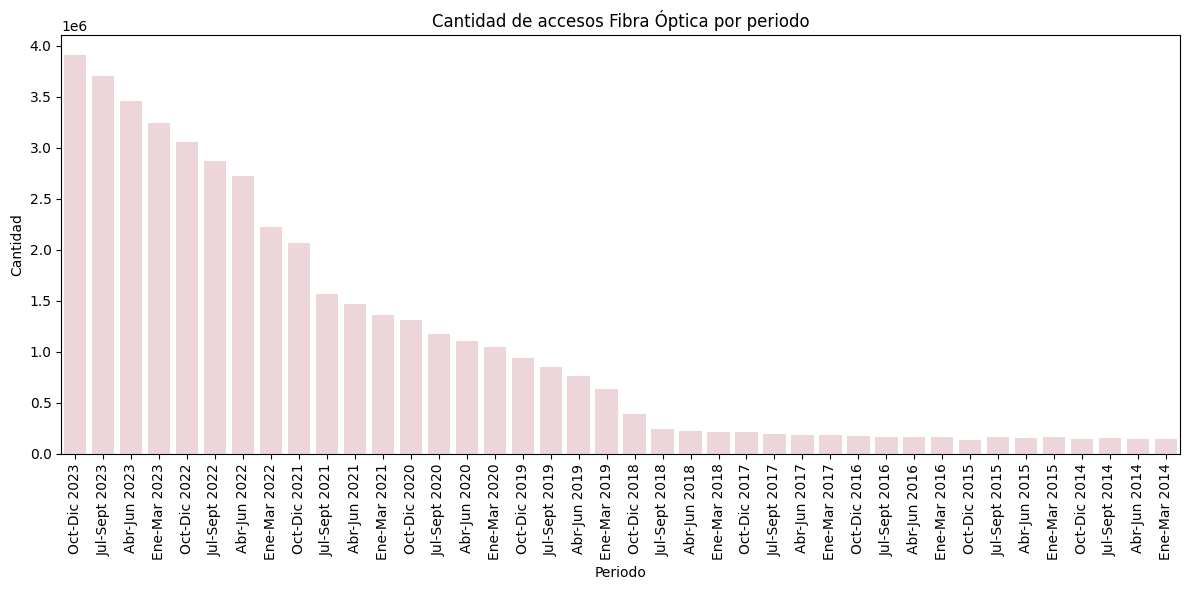

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=totales_accesos_por_tecnologia, x='Periodo', y='Fibra óptica', color='#EFD3D7')
plt.title('Cantidad de accesos Fibra Óptica por periodo')
plt.ylabel('Cantidad')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

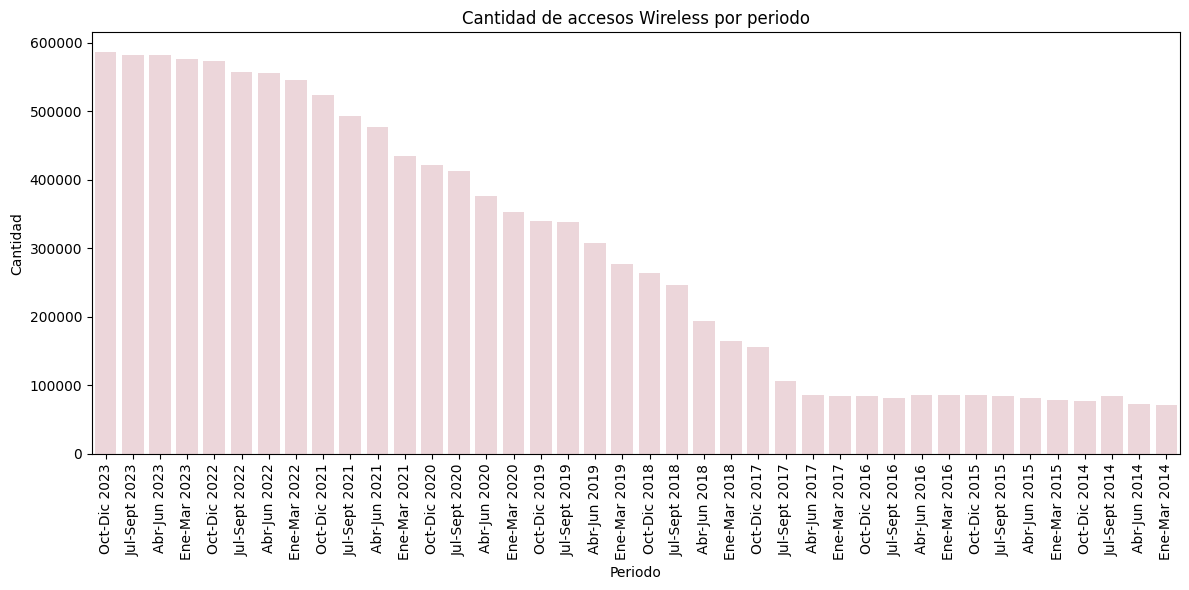

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(data=totales_accesos_por_tecnologia, x='Periodo', y='Wireless', color='#EFD3D7')
plt.title('Cantidad de accesos Wireless por periodo')
plt.ylabel('Cantidad')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

En base a estos gráficos, podemos ver como decae la cantidad de accesos ADSL en los últimos períodos. Y como aumentan los de Fibra óptica, Wireless y Cablemodem. Aunque este último no presenta un pico muy elevado, manteniéndose bastante estable a lo largo de los años.

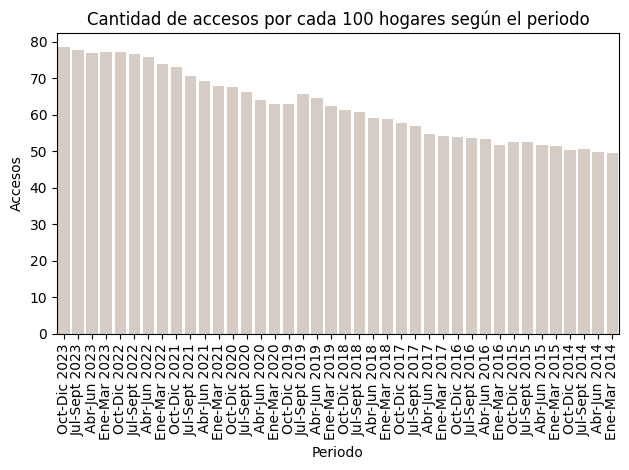

In [37]:
#Ahora, quiero visualizar la cantidad de accesos por cada 100 hogares, según el periodo. Tomando accesos cada 100 hogares como variable cuantitativa, y periodo como cualitativa.
sns.barplot(data=penetracion_totales, x='Periodo', y='Accesos por cada 100 hogares', color='#D6CCC2')
plt.title('Cantidad de accesos por cada 100 hogares según el periodo')
plt.ylabel('Accesos')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

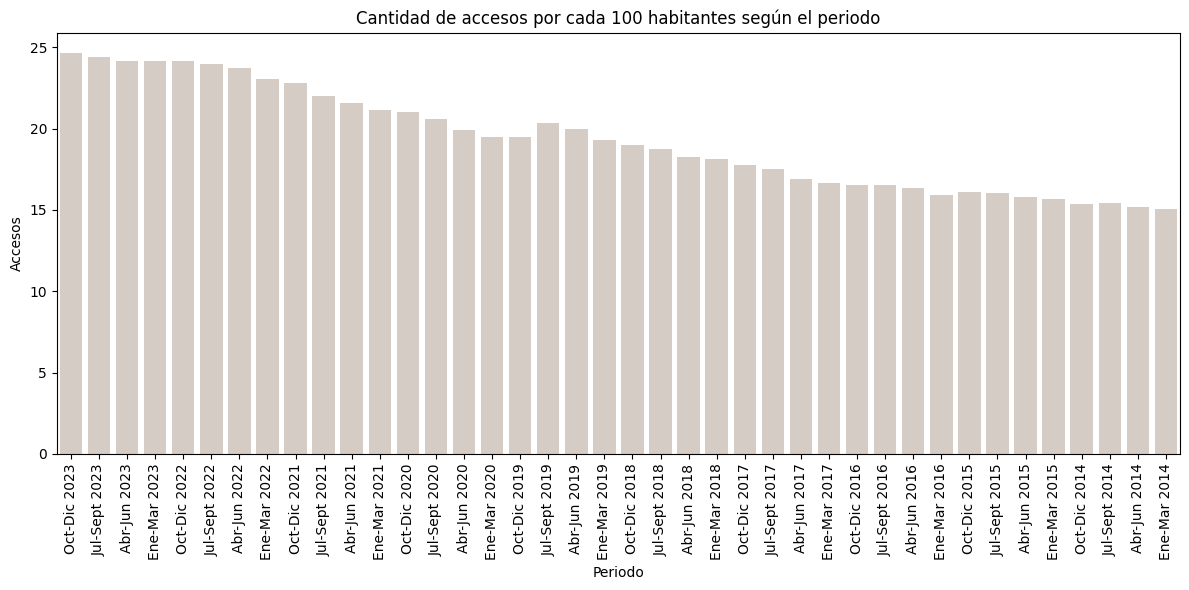

In [38]:
#Repito para accesos por cada 100 habitantes. Tomando accesos como cuantitativa, y periodo como cualitativa.
plt.figure(figsize=(12,6))
sns.barplot(data=penetracion_totales, x='Periodo', y='Accesos por cada 100 hab', color='#D6CCC2')
plt.title('Cantidad de accesos por cada 100 habitantes según el periodo')
plt.ylabel('Accesos')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Acá podemos ver, que ambos gráficos son similares, fluctúan un poco, más visiblemente, entre los períodos 'Jul-Sept 2019, y Ene-Mar 2020' mostranzo un decrecimiento entre estos períodos, manteniéndose bastante estable durante los periodos siguientes, hasta 'Jul-Sept 2020' donde se vuelve a ver un aumento significativo en la cantidad. 

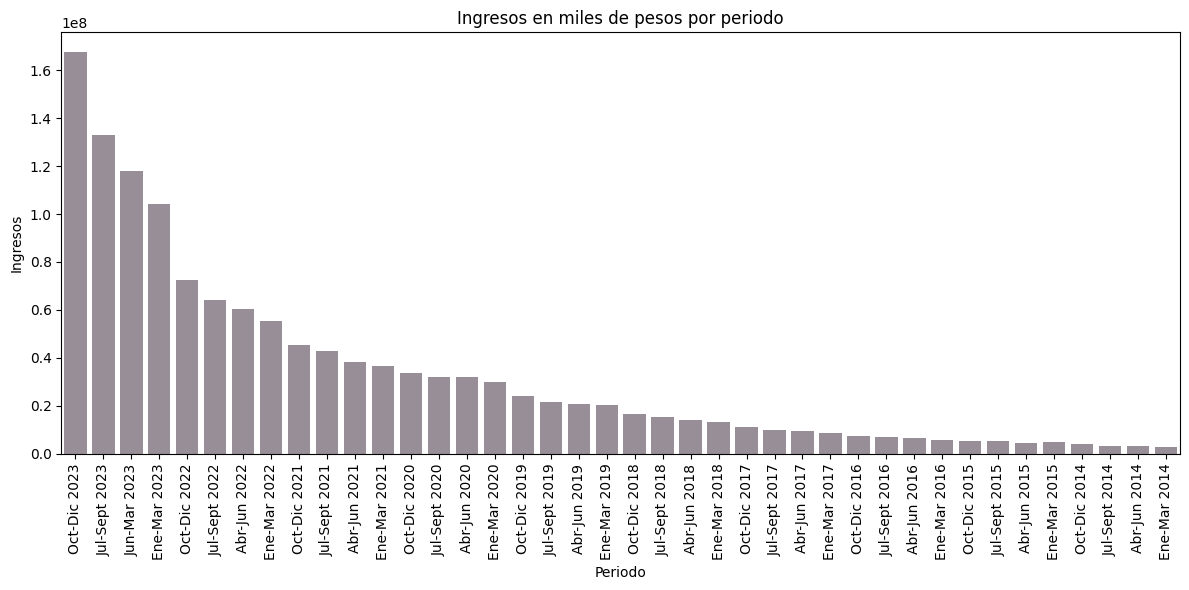

In [39]:
#Ahora, grafiquemos los ingresos por período. Tomando 'Ingresos' como variable cuantitativa, y periodo como cualitativa.
plt.figure(figsize=(12,6))
sns.barplot(data=ingresos, x='Periodo', y='Ingresos (miles de pesos)', color='#9a8c98')
plt.title('Ingresos en miles de pesos por periodo')
plt.ylabel('Ingresos')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()